# Import libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset

In [36]:
df = pd.read_csv("Titanic-Dataset.csv")    # Read a CSV Titanic data set

# Display the first few rows

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Overview

In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking Null values in DATA FRAME

<Axes: >

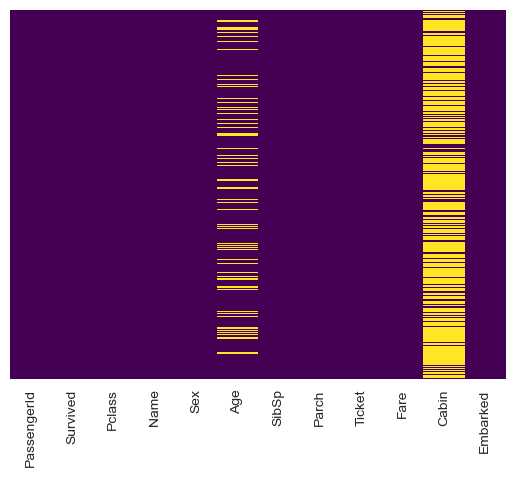

In [41]:
 sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis' ) 

# Quick Insides

In [6]:
df.describe()    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

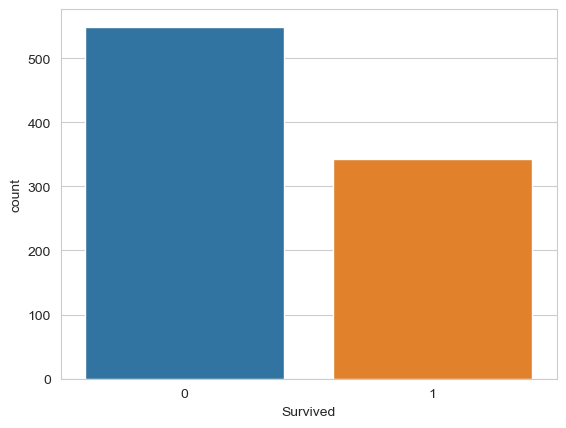

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

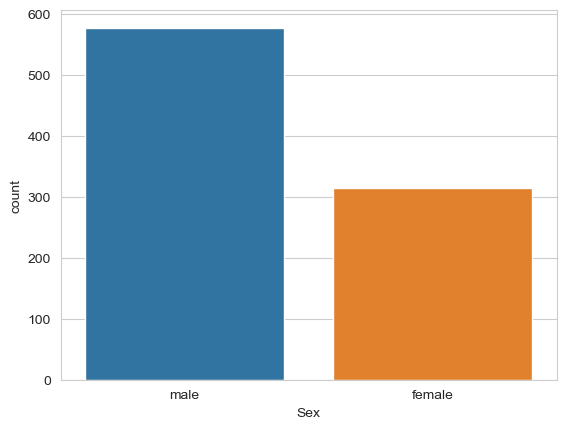

In [8]:
sns.countplot(x='Sex', data=df)

## Notably, The major of passengers onboard were male, which comes as no survived

<Axes: xlabel='Survived', ylabel='count'>

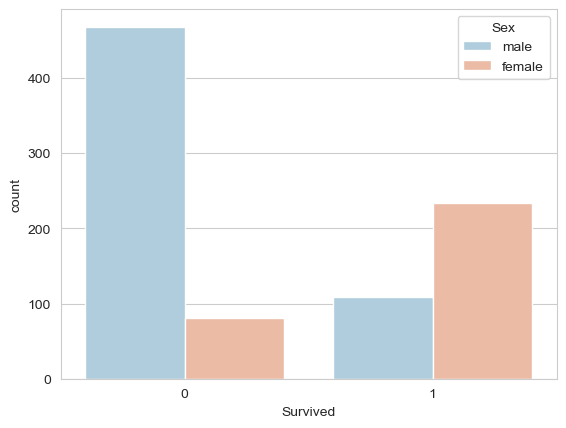

In [9]:
sns.countplot(x="Survived", hue='Sex', data=df, palette='RdBu_r')

<Axes: xlabel='Pclass', ylabel='count'>

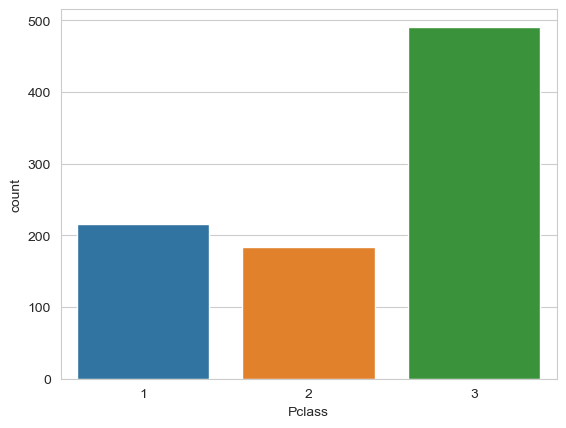

In [10]:
sns.countplot(x='Pclass', data=df)

## Note that the attribute "Pclass" serves as a proxy for indicating the socio-economic class of an individual

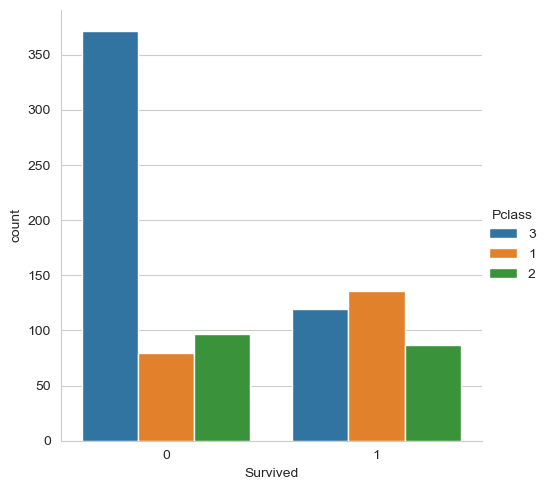

In [11]:
df['Pclass'] = df['Pclass'].astype(str)

sns.catplot(x="Survived", data=df, hue="Pclass", kind='count') 

## As expected, It appears that lower-class passenger had a lower likelihood of survival

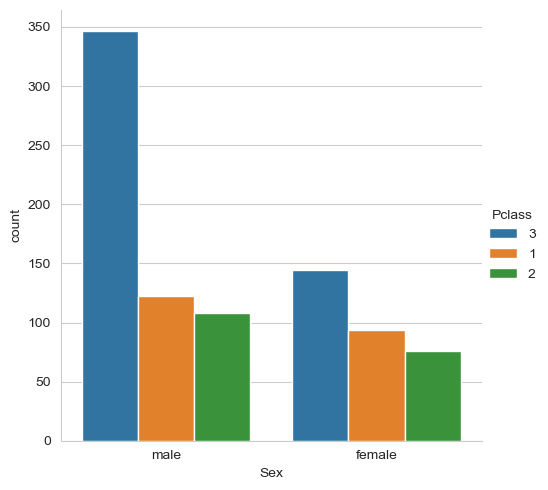

In [12]:
sns.catplot(x='Sex', data=df, hue='Pclass', kind='count')

## However, Considering that the 3rd class had a higher proportional of men compared to woman (and children), it is nothing the famous protocol "Women and Children first" followed by the ships administration when allocating lifeboat spots. This protocol prioritized women and children for the lifeboats during the Titanic's evacuation process.

<Axes: >

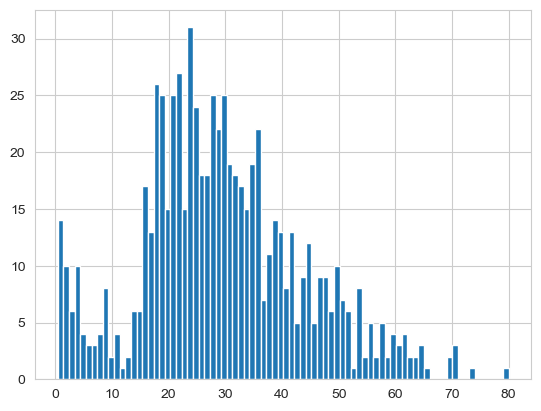

In [13]:
df['Age'].hist(bins=80)

# Plotting Histogram for 'Age' Column

<Axes: >

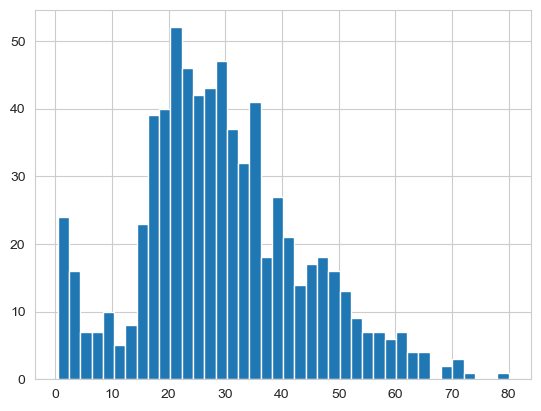

In [14]:
df['Age'].hist(bins=40)

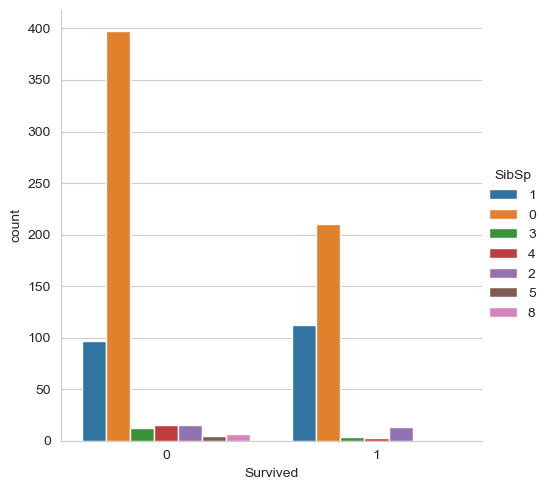

In [15]:
df['SibSp'] = df['SibSp'].astype(str)
sns.catplot(x='Survived', data=df, hue='SibSp', kind='count')

## The attribute "Embarked" provides information about the pasengers port of embarkation with "C" representing Checkbourg, "Q" representing Queenstown and "S" representing Southampton.

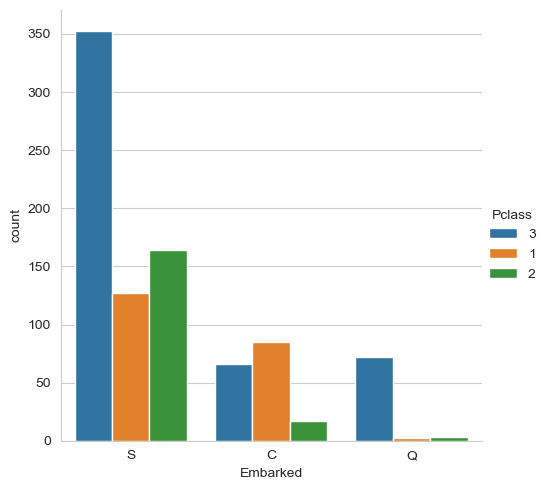

In [16]:
sns.catplot(x="Embarked", data=df, hue="Pclass", kind="count")

# DataSet Cleaning

In [17]:
# Mean of ages
df['Age'].mean()

29.69911764705882

In [18]:
df.groupby(by='Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
def m_age(c):
    Age = c.iloc[0]  # Access 'Age' value
    Pclass = c.iloc[1]  # Access 'Pclass' value
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

# Applying Custom Function to DataFrame Columns: Age and Pclass

In [20]:
df['Age'] = df[['Age', 'Pclass']].apply(m_age, axis=1)

# Heatmap of Missing Values in the DataFrame (Without Y-Axis Labels)

<Axes: >

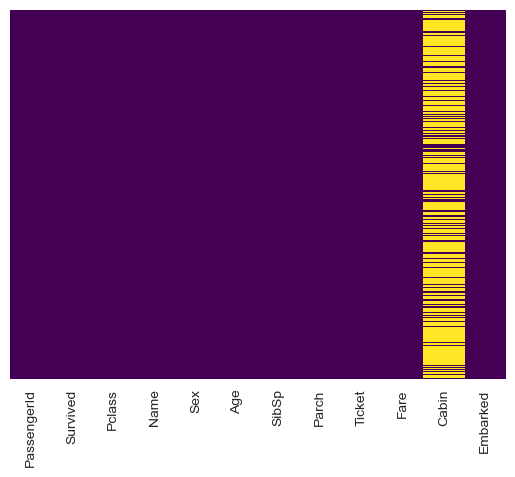

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

# Dropping the Cabin Column from the DataFrame

In [22]:
df.drop('Cabin', axis=1, inplace=True) 

# Visualizing Missing Values in the DataFrame Using a Heatmap

<Axes: >

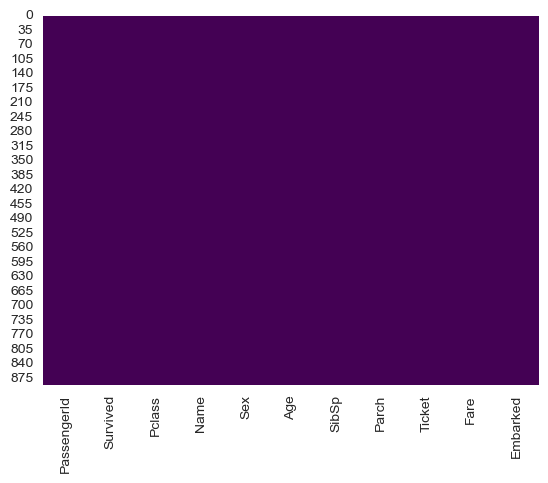

In [23]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Encoding the Sex Column Using One-Hot Encoding (Dropping First Category)

In [24]:
sex=pd.get_dummies(df['Sex'], drop_first=True) 

In [25]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


# Adding Encoded Sex and Embarked Columns to the DataFrame

In [26]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [27]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


# Dropping Unnecessary Columns from DataFrame

In [28]:
df.drop(["Sex", 'Embarked', 'Name', "Ticket"], axis=1, inplace=True) 

In [29]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


# Concatenating New Columns to DataFrame

In [30]:
df = pd.concat([df, sex, embark], axis=1)

In [31]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,25.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False
